# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [20]:
# TODO: Make all necessary imports.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow_datasets as tfds
import json
from tensorflow.keras import layers




## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [2]:
## TODO: Load the dataset with TensorFlow Datasets.
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# TODO: Create a training set, a validation set and a test set.
train_dataset, validation_dataset, test_dataset = dataset['train'], dataset['validation'], dataset['test']

def normalize(image, label):
    image = tf.image.resize(image, [224, 224])  
    image = image / 255.0
    return image, label


train_dataset = train_dataset.map(normalize).batch(32, drop_remainder=True).shuffle(1000) #drop remainder to ensure that all the images have the same dimension
validation_dataset = validation_dataset.map(normalize).batch(32, drop_remainder=True)
test_dataset = test_dataset.map(normalize).batch(32, drop_remainder=True)




Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 100%|██████████| 1/1 [00:00<00:00, 148.20 url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   0%|          | 0/344862509 [00:00<?, ? MiB/s]

Dl Size...: 100%|██████████| 344862509/344862509 [00:00<00:00, 29549104225.63 MiB/s]

Dl Size...: 100%|██████████| 344862509/344862509 [00:00<00:00, 19737169458.68 MiB/s]

Dl Size...: 100%|██████████| 344862509/344862509 [00:00<00:00, 16578697516.83 MiB/s]

Dl Size...: 100%|█████████▉| 344862509/344863011 [00:00<00:00, 14396629916.28 MiB/s]

Dl Size...: 100%|██████████| 344863011/344863011 [00:00<00:00, 12351929109.93 MiB/s]

Dl Size...: 100%|██████████| 344863011/344863011 [00:00<00:00, 10797944911.35 MiB/s]

Dl Size...: 100%|██████████| 344863011/344863011 [00:00<00:00, 9773182344.20 MiB/s] 

Dl Size...: 100%|██████████| 344863011/344863011 [00:00<00:00, 908

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 818193743.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 810928196.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 802463089.46 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 794216491.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 786850946.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 778843773.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 683519378.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 678086133.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 673469307.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 668819666.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 663662078.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 659156027.19 

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 408622250.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 380702263.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 379109047.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 377578087.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 376189516.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 374757130.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 373241015.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 371783743.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 370293248.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 368874191.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 367379642.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:00<00:00, 365872074.28 

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 260420885.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 259742602.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 259023400.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 258311815.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 257619038.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 256952469.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 256284254.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 245126928.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 244403341.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 243695920.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 242973643.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 242351787.45 

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 198058764.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 197664491.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 197263525.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 190846352.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 190440547.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 190078392.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 189716765.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 189350835.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 188991573.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 188617513.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 188254411.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:01<00:00, 187911962.60 

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 155728138.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 155484269.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 155228117.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 154977773.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 154712315.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 154457479.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 154207146.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 153962622.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 153716601.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 149653126.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 149404670.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 149150364.35 

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 131297604.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 131120165.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 130950483.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 130776747.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 130595583.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 130424539.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 127518644.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 127348362.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 127176845.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 127015001.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 126842390.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:02<00:00, 126666132.07 

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 113589854.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 113455520.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 113319392.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 111024922.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 110887997.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 110750757.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 110596071.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 110456785.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 110312785.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 110160879.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 109969147.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 109825523.70 

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 97654860.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 97537119.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 97429700.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 97325942.75 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 97231221.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 95606347.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 95508156.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 95416611.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 95331888.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 95238611.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 95141655.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 95039601.93 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 87566356.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:03<00:00, 87483417.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 86118014.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 86041470.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 85952123.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 85868022.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 85790491.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 85709606.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 85629811.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 85553854.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 85477177.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 85398202.51 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 78077651.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 78008719.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 77948435.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 77885857.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 77824326.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 77764243.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 77700871.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 77636290.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 77573094.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 76556551.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 76491851.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 76423723.68 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 71382922.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 71327607.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 71274110.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 71217806.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 71168195.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 70279332.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 70223539.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 70171956.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 70121619.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 70068210.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 70016859.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:04<00:00, 69967938.36 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 65731919.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 64986858.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 64939011.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 64895774.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 64854368.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 64808174.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 64764661.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 64718499.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 64670942.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 64630175.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 64588446.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 64545850.35 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 60286611.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 60246580.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 60209091.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 60170121.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 60130559.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 60090568.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 60048608.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 59403654.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 59361475.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 59320744.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 59282801.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:05<00:00, 59241595.02 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 55554853.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 55518897.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 55477998.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 55441402.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 55409860.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 55377678.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 55343175.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 55310785.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 55278416.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 55244230.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 55209442.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 54703524.88 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 51975122.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 51946559.75 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 51916699.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 51439876.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 51409216.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 51380070.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 51350865.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 51322982.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 51294298.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 51267247.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 51238023.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:06<00:00, 51208172.24 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 48463647.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 48436687.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 48409458.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 48383719.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 48357807.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 48332817.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 48307260.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 48281634.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 48255981.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 47853921.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 47825221.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 47800090.20 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 45765028.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 45742144.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 45718951.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 45337553.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 45315076.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 45294683.46 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 45272602.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 45250629.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 45229362.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 45204842.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 45182676.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:07<00:00, 45162982.36 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 43026337.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 43006998.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 42985906.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 42966930.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 42947752.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 42925306.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 42903037.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 42880965.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 42553761.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 42535130.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 42517119.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 42498437.22 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 40886644.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 40869611.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 40850545.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 40834617.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 40537801.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 40518604.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 40501405.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 40483650.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 40465101.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 40447857.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 40428941.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 40413195.74 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 38687329.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 38670628.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 38653167.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 38637836.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 38622381.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 38606681.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 38591954.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 38575114.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:08<00:00, 38559019.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 38300950.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 38283029.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 38266891.67 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 36958709.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 36945768.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 36930309.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 36914972.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 36901014.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 36663226.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 36649173.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 36633833.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 36620669.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 36606143.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 36593400.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 36579745.54 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 35158314.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 35143493.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 35129721.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 35113663.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 35097369.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 35082065.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 35068627.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 35054800.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 35039553.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 35026647.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 34809503.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:09<00:00, 34794291.93 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 33459326.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 33445702.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 33428031.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 33415146.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 33400320.89 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 33386808.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 33371840.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 33356740.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 33342819.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 33146560.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 33131600.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 33117669.55 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 32102302.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 32090866.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 31909145.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 31896883.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 31883478.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 31870629.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 31857728.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 31844245.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 31832661.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 31820268.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 31806600.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:10<00:00, 31795517.52 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 30702254.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 30691300.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 30680252.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 30669961.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 30507097.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 30496721.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 30486451.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 30476973.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 30466123.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 30455703.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 30445422.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 30435238.93 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 29435358.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 29425716.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 29416492.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 29407222.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 29397394.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 29387629.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 29378420.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 29368814.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 29359285.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 29209434.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 29198196.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:11<00:00, 29188712.38 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 28408728.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 28399547.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 28391143.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 28250646.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 28241656.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 28233278.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 28224027.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 28215253.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 28207385.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 28198149.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 28189740.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 28181140.50 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 27320995.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 27312162.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 27303341.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 27295147.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 27286944.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 27278656.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 27270281.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 27138848.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 27128542.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 27119586.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 27110881.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:12<00:00, 27102476.28 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 26312427.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 26302962.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 26295414.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 26287747.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 26280071.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 26272379.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 26264087.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 26255831.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 26248112.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 26239130.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 26117717.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 26107753.26 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 25461180.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 25343842.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 25336020.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 25329010.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 25322750.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 25315272.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 25308593.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 25300835.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 25293271.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 25285729.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 25278628.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:13<00:00, 25163251.48 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23911764.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23904870.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23898053.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23891522.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23885240.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23878646.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23775593.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23768903.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23762061.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23755769.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23749068.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23742921.49 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23133498.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23127506.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23121750.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23116312.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23110121.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23104640.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23098438.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23092570.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23085137.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23079231.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:14<00:00, 23073209.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 22979221.16 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 22478509.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 22473160.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 22384495.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 22378751.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 22373138.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 22367755.87 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 22362349.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 22355975.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 22350032.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 22344889.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 22338905.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 22333538.98 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 21781413.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 21775723.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 21769821.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 21764213.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 21683761.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 21677153.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 21671755.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 21666243.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 21660423.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 21654212.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 21648563.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:15<00:00, 21643172.96 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 21128153.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 21123604.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 21117922.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 21112934.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 21107325.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 21102430.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 21097282.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 21019293.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 21014063.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 21008713.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 21004067.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 20998900.68 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 20512458.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 20507814.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 20502881.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 20497960.46 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 20493433.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 20488292.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 20483219.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 20478972.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 20474658.75 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 20469798.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 20397699.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:16<00:00, 20392758.30 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19996945.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19930792.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19925282.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19920506.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19915719.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19910929.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19906180.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19901569.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19897134.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19892776.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19887551.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19883331.66 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19454732.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19450125.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19446115.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19441603.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19437032.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19369848.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19365633.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19360925.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19357280.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19353167.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19348888.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:17<00:00, 19344598.84 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18940388.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18936052.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18930783.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18926652.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18922238.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18918005.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18913323.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18909812.89 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18905586.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18901487.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18839366.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18835195.91 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18503196.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18499137.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18495213.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18435516.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18431732.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18426985.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18422461.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18418235.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18414185.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18410406.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18406577.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:18<00:00, 18402419.22 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 18026681.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 18022937.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 18018258.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 18014648.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17958575.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17954958.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17949968.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17946246.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17942026.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17938158.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17934386.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17930389.20 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17579439.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17575405.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17571030.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17567044.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17563383.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17559300.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17555727.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17500107.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17496344.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17491999.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17487938.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:19<00:00, 17483991.49 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 17137854.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 17134284.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 17130755.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 17127640.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 17124252.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 17120588.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 17068767.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 17065158.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 17061833.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 17058138.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 17054079.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 17050186.28 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 16738007.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 16734917.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 16731526.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 16728149.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 16725169.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 16721637.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 16718713.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 16715302.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 16712268.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 16708812.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 16705833.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:20<00:00, 16656911.52 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 16338927.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 16335707.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 16332612.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 16329028.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 16325840.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 16322491.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 16319442.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 16316753.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 16313519.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 16310531.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 16264263.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 16261157.57 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 16009726.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 16007080.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 15962896.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 15959350.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 15956439.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 15953530.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 15950391.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 15947793.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 15944845.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 15941973.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 15939218.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:21<00:00, 15936569.12 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15650436.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15647649.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15644998.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15602349.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15599498.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15596579.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15593986.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15591507.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15588982.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15586170.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15583085.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15580325.29 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15315085.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15312487.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15309558.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15306874.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15304304.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15301829.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15299421.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15296758.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15256549.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15253863.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15251018.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:22<00:00, 15248281.31 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14991661.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14988960.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14986230.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14983683.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14981182.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14978580.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14975921.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14973515.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14970971.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14968304.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14965692.75 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14926980.12 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14715822.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14713261.89 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14710417.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14672752.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14670252.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14667336.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14664763.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14662452.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14659981.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14657629.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14655096.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14652620.15 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14417913.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14415388.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14413119.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14410658.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14408457.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14406037.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:23<00:00, 14403544.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 14367182.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 14364882.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 14362370.89 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 14360132.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 14357803.50 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 14131448.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 14129086.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 14126748.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 14124470.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 14122001.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 14119856.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 14117429.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 14114918.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 14112734.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 14110374.46 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 14107928.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 14072766.09 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 13885035.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 13882739.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 13848192.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 13845927.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 13843435.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 13841176.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 13838939.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 13836666.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 13834539.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 13832315.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 13830097.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:24<00:00, 13827956.94 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13614447.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13612178.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13610029.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13607868.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13605674.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13573773.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13571771.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13569657.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13567562.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13565568.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13563596.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13561515.29 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13352582.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13349748.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13346779.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13343863.87 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13312661.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13309588.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13306533.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13303505.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13300806.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13297828.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13294782.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:25<00:00, 13291962.45 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 13090881.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 13061456.89 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 13059492.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 13057624.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 13055687.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 13053603.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 13051564.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 13049406.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 13047224.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 13045289.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 13043291.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 13041324.16 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 12851762.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 12850003.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 12848021.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 12845906.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 12817147.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 12815116.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 12812972.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 12811155.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 12809266.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 12807309.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 12805346.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:26<00:00, 12803612.36 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12620904.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12619208.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12617437.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12615686.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12613663.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12611793.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12583241.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12581474.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12579676.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12577931.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12576046.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12574153.06 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12397729.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12395696.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12393943.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12392303.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12390333.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12388711.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12386764.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12359230.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12357346.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12355458.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12353548.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:27<00:00, 12351885.31 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 12209102.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 12183594.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 12181776.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 12179983.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 12178451.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 12176631.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 12174952.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 12173164.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 12171267.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 12169580.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 12167728.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 12140994.69 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 12001906.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 12000299.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 11998644.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 11996989.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 11971796.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 11969723.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 11967924.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 11966142.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 11964390.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 11962504.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 11960442.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:28<00:00, 11958490.17 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11800370.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11798673.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11796942.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11795307.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11793628.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11792021.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11767507.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11765817.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11764065.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11762491.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11760779.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11758958.20 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11604922.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11603378.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11601890.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11600330.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11598578.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11597009.87 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11595493.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11594018.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11570227.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11568554.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11566804.89 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:29<00:00, 11565129.10 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11415019.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11413310.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11411676.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11409895.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11408247.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11406786.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11405199.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11403662.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11402280.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11379804.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11378349.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11376844.08 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11230788.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11229258.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11227539.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11226095.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11224451.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11223063.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11221442.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11219885.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11218350.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11195451.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11193915.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:30<00:00, 11192257.68 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 11050309.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 11048732.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 11047162.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 11045508.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 11043897.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 11042364.87 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 11040548.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 11038801.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 11016506.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 11015036.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 11013364.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 11011924.16 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 10874849.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 10873295.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 10871840.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 10870462.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 10868801.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 10867327.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 10865879.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 10864476.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 10843705.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 10842381.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 10840861.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:31<00:00, 10839376.84 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10706862.75 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10705073.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10703478.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10702076.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10700602.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10699244.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10697860.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10696464.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10694964.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10674931.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10673516.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10672137.93 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10541682.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10540286.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10538939.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10537655.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10536343.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10535022.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10533631.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10532332.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10531109.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10512076.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10510822.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:32<00:00, 10509299.71 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10382485.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10380700.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10379260.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10377872.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10376462.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10375015.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10373595.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10354610.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10353263.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10351894.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10350502.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10349169.18 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10228785.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10227533.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10226252.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10225022.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10223659.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10222441.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10221354.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10220063.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10202040.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10200707.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10199503.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:33<00:00, 10198295.79 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 10100493.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 10082162.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 10080846.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 10079485.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 10078261.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 10076979.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 10075813.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 10074313.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 10073054.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 10071847.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 10070666.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 10053053.87 MiB/s]

Dl S

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 9957461.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 9956398.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 9955112.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 9953829.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 9936653.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 9935507.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 9934340.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 9933024.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 9931807.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 9930652.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 9929494.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:34<00:00, 9928336.17 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9817279.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9815969.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9814794.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9813545.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9796631.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9795324.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9794100.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9792836.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9791485.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9790355.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9789141.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9788061.94 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9679492.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9678349.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9677259.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9676106.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9675045.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9658622.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9657545.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9655995.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9654936.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9653646.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9652559.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:35<00:00, 9651334.95 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9544817.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9543675.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9542600.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9525833.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9524695.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9523376.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9522313.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9520988.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9519868.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9518692.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9517538.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9516473.80 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9416006.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9414986.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9413991.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9412989.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9411870.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9410774.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9395364.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9394373.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9393332.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9392358.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9391419.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:36<00:00, 9390476.83 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9291824.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9290910.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9289886.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9288989.46 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9287973.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9287047.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9286027.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9284954.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9283957.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9269114.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9268088.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9267119.65 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9186595.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9185601.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9170527.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9169522.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9168559.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9167591.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9166583.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9165624.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9164665.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9163692.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9162756.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:37<00:00, 9161808.33 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 9068446.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 9067549.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 9066642.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 9065600.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 9064679.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 9050242.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 9049273.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 9048313.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 9047284.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 9046402.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 9045462.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 9044438.55 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 8954119.87 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 8953101.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 8952054.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 8951015.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 8950010.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 8949010.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 8948063.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 8947104.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 8933106.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 8932167.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 8931141.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:38<00:00, 8930233.70 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8838101.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8837155.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8836272.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8835311.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8834416.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8833521.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8832543.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8818830.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8817857.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8816811.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8815789.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8814772.41 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8726916.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8725952.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8725025.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8724118.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8723122.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8722261.89 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8721271.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8707719.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8706805.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8705829.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8704902.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:39<00:00, 8703913.12 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8619071.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8618073.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8617199.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8616294.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8615438.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8614540.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8613716.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8612710.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8598975.75 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8598041.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8597191.87 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8596270.86 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8510869.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8509887.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8509009.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8508116.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8507178.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8506358.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8493376.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8492318.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8491548.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8490703.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8489872.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:40<00:00, 8488937.10 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8406442.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8405560.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8404693.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8403747.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8402747.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8390150.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8389187.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8388240.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8387256.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8386326.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8385479.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8384632.76 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8303680.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8302929.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8302096.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8301319.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8289249.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8288361.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8287508.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8286708.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8285824.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8284966.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8284148.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:41<00:00, 8283244.70 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8205544.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8204668.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8203921.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8203074.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8202215.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8190356.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8189561.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8188828.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8188093.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8187302.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8186571.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8185763.10 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8110119.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8109307.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8108471.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8107728.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8106947.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8106198.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8094561.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8093774.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8092962.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8092142.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8091375.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:42<00:00, 8090623.68 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 8016915.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 8016106.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 8015372.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 8014556.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 8013828.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 8013109.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 8012402.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 8011661.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 8000969.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 8000149.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 7999328.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 7998543.66 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 7926549.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 7925765.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 7925002.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 7924240.75 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 7923491.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 7922752.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 7922003.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 7921329.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 7920597.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 7909412.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 7908716.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 7908014.35 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 7848508.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:43<00:00, 7847738.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7836857.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7836098.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7835363.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7834680.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7833915.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7833223.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7832477.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7831801.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7831144.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7830445.36 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7761459.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7760738.89 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7760064.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7759332.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7748768.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7748024.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7747345.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7746673.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7745943.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7745258.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7744578.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7743828.22 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7675092.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7674386.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:44<00:00, 7673723.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7662660.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7661877.46 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7661102.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7660404.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7659693.46 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7659023.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7658267.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7657553.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7656889.85 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7591460.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7590719.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7590091.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7589448.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7578915.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7578258.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7577552.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7576879.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7576263.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7575595.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7574961.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7574289.46 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7508540.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7507772.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7507103.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:45<00:00, 7506405.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7496321.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7495657.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7495006.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7494313.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7493636.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7492900.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7492272.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7491569.97 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7427214.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7426575.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7425919.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7425300.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7415814.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7415126.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7414359.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7413654.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7412959.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7412267.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7411620.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7410873.73 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7348129.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7347489.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7346909.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:46<00:00, 7346274.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7336683.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7336050.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7335410.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7334773.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7334101.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7333558.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7332891.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7332332.55 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7271466.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7270896.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7270279.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7269689.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7268999.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7259572.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7258875.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7258197.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7257530.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7256903.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7256232.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7255598.09 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7195810.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7195230.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7194624.87 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7194008.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:47<00:00, 7193355.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7184226.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7183528.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7182948.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7182321.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7181682.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7181056.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7180487.58 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7122581.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7122039.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7121506.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7120925.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7120283.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7119656.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7119096.89 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7110118.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7109497.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7108834.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7108231.46 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7107639.02 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7050471.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7049929.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7049418.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7048847.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7048255.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7047705.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7047091.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7046567.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:48<00:00, 7045983.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 7037232.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 7036643.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 7036113.85 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6980612.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6979989.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6979379.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6978808.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6978230.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6977593.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6977022.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6976466.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6975904.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6975278.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6966391.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6965810.73 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6919128.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6918574.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6910338.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6909778.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6909183.75 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6908654.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6908143.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6907529.87 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6906954.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6906398.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6905843.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:49<00:00, 6905269.90 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6851951.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6851406.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6850869.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6850266.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6841818.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6841155.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6840598.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6840045.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6839425.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6838924.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6838386.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6837816.39 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6785347.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6784828.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6784275.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6783750.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6783260.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6782754.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6774872.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6774283.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6773788.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6773241.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6772766.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:50<00:00, 6772252.22 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6721305.87 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6720801.75 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6720322.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6719801.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6719276.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6718814.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6718320.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6717816.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6717306.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6716778.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6708956.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6708434.06 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6666233.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6665769.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6665317.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6664780.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6657039.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6656537.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6656056.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6655582.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6655117.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6654582.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6654065.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:51<00:00, 6653577.36 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6604351.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6603873.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6603343.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6602852.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6602361.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6601867.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6601367.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6600890.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6593399.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6592895.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6592435.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6591931.91 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6551268.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6543568.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6543075.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6542572.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6542077.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6541613.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6541161.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6540669.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6540212.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6539720.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6539277.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:52<00:00, 6538809.30 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6492109.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6491624.87 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6491167.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6490722.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6490232.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6489789.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6489334.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6482061.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6481455.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6480940.46 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6480456.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6479955.65 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6433429.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6432951.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6432417.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6431934.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6431475.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6430969.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6430530.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6430062.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6429606.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6429150.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6421717.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:53<00:00, 6421252.82 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6381843.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6381345.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6374374.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6373876.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6373342.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6372872.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6372410.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6371931.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6371458.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6370972.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6370500.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6370016.58 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6324287.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6323782.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6323326.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6322842.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6315849.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6315341.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6314876.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6314407.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6313962.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6313454.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6313034.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:54<00:00, 6312583.06 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6267690.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6267197.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6266750.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6266251.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6265762.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6265311.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6258233.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6257727.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6257271.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6256800.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6256310.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6255854.90 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6211946.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6211474.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6211018.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6210550.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6210089.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6209668.87 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6209201.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6202332.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6201824.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6201308.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6200835.46 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:55<00:00, 6200389.61 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6157628.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6157194.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6156666.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6156169.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6155690.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6155147.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6154711.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6154234.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6153782.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6146991.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6146508.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6146073.17 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6110045.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6103349.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6102925.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6102484.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6102036.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6101565.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6101072.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6100647.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6100246.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6099837.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6099434.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6099023.62 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6057757.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6057346.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6056951.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6056571.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:56<00:00, 6056157.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:57<00:00, 6049686.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:57<00:00, 6049283.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:57<00:00, 6048825.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:57<00:00, 6048373.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:57<00:00, 6047984.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:57<00:00, 6047556.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:57<00:00, 6047137.39 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:57<00:00, 6004557.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:57<00:00, 6004066.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:57<00:00, 6003628.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:57<00:00, 5997405.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:57<00:00, 5996741.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:57<00:00, 5996232.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:57<00:00, 5995742.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:57<00:00, 5995274.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:57<00:00, 5994746.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:57<00:00, 5994263.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:57<00:00, 5993801.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:57<00:00, 5993353.38 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5945645.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5945147.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5944712.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5944249.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5943753.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5943282.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5942805.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5942348.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5941883.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5941394.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5935181.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5934710.55 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5893260.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5892806.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5892347.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5891903.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5891411.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5890960.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5890502.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5884439.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5883932.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5883466.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5883005.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:58<00:00, 5882537.27 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5841588.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5841174.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5840718.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5834741.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5834278.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5833824.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5833395.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5832930.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5832468.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5832015.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5831580.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5831143.30 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5785647.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5785212.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5784780.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5784362.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5783930.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5783486.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5783007.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5782589.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5782176.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5776332.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5775896.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [00:59<00:00, 5775456.25 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5736463.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5736077.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5735588.75 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5735140.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5734703.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5734307.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5728399.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5727962.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5727508.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5727074.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5726624.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5726182.40 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5688645.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5688304.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5687939.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5687523.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5687134.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5686767.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5681029.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5680650.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5680299.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5679923.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5679603.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:00<00:00, 5679201.70 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5643328.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5642994.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5642653.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5642336.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5641978.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5641628.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5641259.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5640909.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5640582.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5640219.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5634541.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5634142.21 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5603937.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5603599.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5598206.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5597864.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5597535.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5597182.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5596835.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5596486.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5596138.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5595776.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5595373.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:01<00:00, 5595005.15 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5560180.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5559837.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5559516.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5559150.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5558801.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5558461.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5552923.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5552552.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5552169.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5551860.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5551517.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5551186.54 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5517346.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5516975.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5516622.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5516256.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5515900.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5515568.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5515231.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5514871.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5514534.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5514189.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5508834.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5508466.89 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5479795.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5479448.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:02<00:00, 5479122.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5473731.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5473398.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5473054.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5472731.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5472405.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5472045.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5471739.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5471297.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5470982.93 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5430736.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5430229.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5429711.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5429218.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5428721.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5428238.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5427722.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5427217.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5421961.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5421459.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5420986.46 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:03<00:00, 5420535.60 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5378250.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5377753.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5377302.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5376854.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5371428.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5370930.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5370445.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5369944.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5369472.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5368993.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5368576.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5368111.80 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5321488.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5321026.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5320573.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5320103.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5319653.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5319224.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5318765.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5313701.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5313207.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5312753.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5312284.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:04<00:00, 5311790.36 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:05<00:00, 5270616.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:05<00:00, 5270156.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:05<00:00, 5269723.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:05<00:00, 5264701.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:05<00:00, 5264232.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:05<00:00, 5263751.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:05<00:00, 5263334.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:05<00:00, 5262894.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:05<00:00, 5262465.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:05<00:00, 5261989.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:05<00:00, 5256941.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:05<00:00, 5256467.00 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5216394.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5215935.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5215508.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5215050.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5214600.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5214172.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5209253.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5208753.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5208264.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5207836.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5207373.87 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5206831.71 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5169990.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5169658.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5169363.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5168956.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5168519.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5168192.75 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5167883.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5167553.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5167226.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5162446.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5162148.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:06<00:00, 5161839.60 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5131019.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5130680.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5130312.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5129916.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5129577.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5129177.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5128862.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5128508.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5123894.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5123578.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5123219.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5122899.74 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5093188.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5092898.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5092592.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5092331.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5092031.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5091728.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5091433.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5091173.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5090891.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5086348.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5086030.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:07<00:00, 5085712.34 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5061191.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5060922.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5056399.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5056073.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5055784.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5055474.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5055159.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5054780.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5054489.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5054152.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5053859.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5053546.84 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5025254.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5024975.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5024702.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5024395.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5024094.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5019651.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5019353.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5019065.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5018774.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5018412.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5018082.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:08<00:00, 5017788.48 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4988378.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4988104.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4987842.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4987559.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4983265.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4982967.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4982679.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4982379.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4982096.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4981791.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4981485.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4981193.86 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4952301.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4952003.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4947741.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4947360.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4947046.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4946715.46 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4946404.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4946062.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4945712.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4945418.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4945069.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:09<00:00, 4944753.46 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4911905.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4911586.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4911323.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4911037.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4910753.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4910485.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4910210.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4909963.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4909695.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4905431.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4905146.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4904875.19 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4882273.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4881994.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4881745.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4877665.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4877385.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4877102.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4876831.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4876546.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4876250.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4875979.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4875699.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:10<00:00, 4875408.45 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4849003.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4848708.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4848450.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4848194.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4847919.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4847644.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4843477.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4843223.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4842953.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4842595.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4842289.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4841996.71 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4815962.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4815697.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4815438.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4815188.87 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4814929.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4814669.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4814382.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4814146.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4813893.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4813613.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4809653.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:11<00:00, 4809379.43 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4787915.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4787664.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4787414.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4787176.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4786919.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4782846.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4782569.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4782327.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4782070.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4781811.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4781558.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4781279.72 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4756287.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4756039.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4755771.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4755518.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4755259.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4755001.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4754752.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4754510.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4754237.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4753983.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4749918.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4749646.11 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4729324.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4729080.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4728827.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4728583.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4728293.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4728024.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:12<00:00, 4727726.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4723885.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4723625.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4723394.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4723108.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4722844.07 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4697930.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4697695.89 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4697396.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4697145.87 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4696891.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4696627.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4696355.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4696081.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4695808.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4691925.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4691658.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4691368.82 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4670460.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4666525.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4666246.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4665992.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4665720.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4665474.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4665234.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4664973.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4664707.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4664461.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4664229.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:13<00:00, 4664007.16 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4639570.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4639301.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4639055.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4638818.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4635057.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4634811.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4634552.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4634305.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4634079.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4633854.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4633610.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4633366.52 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4609396.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4609155.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4608891.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4608640.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4608372.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4608122.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4607893.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4604251.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4603987.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4603753.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4603528.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:14<00:00, 4603293.56 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4579760.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4579464.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4579223.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4578969.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4578715.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4578476.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4578212.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4577974.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4577734.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4577509.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4573758.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4573489.86 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4549133.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4548804.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4548465.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4548117.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4547789.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4547454.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4547124.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4543559.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4543207.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4542858.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4542535.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:15<00:00, 4542176.03 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4517948.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4517708.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4517481.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4513793.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4513547.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4513317.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4513090.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4512860.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4512671.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4512443.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4512202.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4511976.08 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4489650.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4489424.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4489213.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4488996.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4488777.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4488562.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4488335.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4488135.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4484504.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4484267.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4484054.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:16<00:00, 4483811.62 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4464681.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4461295.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4461039.46 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4460828.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4460592.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4460353.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4460130.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4459896.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4459638.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4459404.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4459172.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4458927.34 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4436398.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4436177.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4435965.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4432441.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4432205.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4431987.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4431751.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4431530.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4431310.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4431081.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4430854.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:17<00:00, 4430606.04 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4408432.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4408210.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4407951.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4407728.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4404324.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4404071.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4403822.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4403596.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4403376.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4403165.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4402944.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4402700.48 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4385303.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4381926.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4381653.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4381518.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4381391.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4381271.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4381135.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4381007.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4380877.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4380760.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4380627.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:18<00:00, 4380175.98 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4364743.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4364586.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4364315.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4364138.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4363981.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4363841.75 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4363663.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4363464.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4363325.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4363198.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4363028.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4362841.41 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4347726.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4347617.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4347380.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4347247.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4347122.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4346984.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4346855.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4346435.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4343242.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4343110.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4342889.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4342767.44 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4330836.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4330568.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4330385.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4330217.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4330084.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4326924.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4326736.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4326562.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4326426.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4326214.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4326090.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:19<00:00, 4325964.18 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:20<00:00, 4310695.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:20<00:00, 4310544.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:20<00:00, 4310354.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:20<00:00, 4310200.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:20<00:00, 4310025.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:22<00:00, 4162787.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:22<00:00, 4159833.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:22<00:00, 4159670.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:22<00:00, 4159522.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:22<00:00, 4159392.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:22<00:00, 4159230.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:22<00:00, 4159080.48 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4148206.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4148056.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4147928.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4147821.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4144983.89 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4144855.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4144662.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4144517.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4144370.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4144194.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4144039.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4143915.20 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4113592.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4113480.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4113373.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4113266.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4113049.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4110305.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4110118.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4110004.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4109817.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4109668.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4109552.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:23<00:00, 4109389.89 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4098601.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4098412.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4095622.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4095482.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4076190.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4076056.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4075945.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4075838.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4075734.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4075609.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4075390.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4075187.43 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4064630.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4061794.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4061680.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4061516.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4061324.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4061175.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4061052.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4060932.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4060812.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4060694.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4060576.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:24<00:00, 4060461.05 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:25<00:00, 4027844.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:25<00:00, 4027721.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:25<00:00, 4027605.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:25<00:00, 4027490.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:25<00:00, 4027380.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:25<00:00, 4027272.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:25<00:00, 4027162.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:25<00:00, 4027057.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:25<00:00, 4026951.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:25<00:00, 4026842.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:25<00:00, 4026734.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:25<00:00, 4026599.30 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:25<00:00, 4013336.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:25<00:00, 4013232.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:25<00:00, 4013121.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:25<00:00, 4012943.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3994573.01 MiB/s][A

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3994419.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3994315.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3994211.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3994109.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3991397.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3991287.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3991179.98 MiB/s]

Dl Size...: 10

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3980624.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3980520.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3980347.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3980243.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3977646.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3977430.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3977308.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3977158.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3977061.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3976955.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3976851.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3976755.60 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3966734.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3966633.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:26<00:00, 3966529.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3963875.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3963582.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3963468.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3963312.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3963165.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3963016.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3962906.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3962740.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3962588.31 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3949990.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3949798.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3949656.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3949526.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3949416.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3949260.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3949108.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3948994.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3948889.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3948786.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3948679.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3948572.68 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3936158.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3936055.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3935947.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3935838.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3935415.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3935301.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3935127.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3935020.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3934921.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3934822.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3932252.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:27<00:00, 3932144.70 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:28<00:00, 3905440.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:28<00:00, 3905334.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:28<00:00, 3905232.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:28<00:00, 3905135.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:28<00:00, 3905030.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:28<00:00, 3904516.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:28<00:00, 3904383.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:28<00:00, 3904282.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:28<00:00, 3904178.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:28<00:00, 3904077.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:28<00:00, 3903976.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:28<00:00, 3903747.73 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:28<00:00, 3891661.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:28<00:00, 3891558.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:28<00:00, 3891464.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:28<00:00, 3891216.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3873742.87 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3873598.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3873458.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3873301.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3873159.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3873025.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3870468.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3870331.87 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3857002.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3856852.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3856696.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3856508.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3856355.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3856209.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3856076.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3855932.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3855791.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3855660.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3853208.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:29<00:00, 3853049.11 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3830762.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3830603.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3830455.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3829968.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3827277.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3827141.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3827007.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3826862.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3826718.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3826574.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3826414.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3826274.72 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3813323.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3813113.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3810630.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3810526.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3810422.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3800959.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3800862.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3800759.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3800665.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3800506.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3797961.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:30<00:00, 3797864.76 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3788627.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3788518.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3788419.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3788328.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3788231.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3788133.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3788019.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3785557.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3785414.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3785313.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3785212.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3785121.69 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3759756.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3759618.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3759482.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3759362.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3759237.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3759123.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3758989.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3756664.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3756519.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3756385.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3756268.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:31<00:00, 3756181.93 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3747208.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3747070.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3746956.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3746813.87 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3746694.99 MiB/s]

Extraction completed...:  24%|██▍       | 1954/8189 [01:32<00:54, 113.41 file/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3726703.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3726616.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3726536.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3724165.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3723974.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3723850.55 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3715079.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3714931.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3714810.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3714688.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3714597.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3714465.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3712173.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3712053.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3711943.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3711804.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3711682.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:32<00:00, 3711555.97 MiB/s]

Extraction compl

Dl Size...: 100%|██████████| 344878000/344878000 [01:33<00:00, 3687300.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:33<00:00, 3687162.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:33<00:00, 3687034.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:33<00:00, 3686917.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:33<00:00, 3686797.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:33<00:00, 3686678.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:33<00:00, 3684431.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:33<00:00, 3684331.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:33<00:00, 3684228.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:33<00:00, 3684081.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:33<00:00, 3683991.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:33<00:00, 3683899.73 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:33<00:00, 3675124.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:33<00:00, 3675026.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:33<00:00, 3674864.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:33<00:00, 3672644.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:33<00:00, 3672537.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:34<00:00, 3659276.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:34<00:00, 3657035.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:34<00:00, 3656950.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:34<00:00, 3656780.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:34<00:00, 3656667.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:34<00:00, 3656550.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:34<00:00, 3656436.85 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:34<00:00, 3648034.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:34<00:00, 3647911.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:34<00:00, 3647811.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:34<00:00, 3647724.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:34<00:00, 3647635.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:34<00:00, 3645454.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:34<00:00, 3645368.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:34<00:00, 3645225.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:34<00:00, 3645055.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:34<00:00, 3644958.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:34<00:00, 3644796.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:34<00:00, 3644684.15 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:35<00:00, 3620988.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:35<00:00, 3620899.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:35<00:00, 3618691.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:35<00:00, 3618594.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:35<00:00, 3618436.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:35<00:00, 3618318.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:35<00:00, 3618200.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:35<00:00, 3618080.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:35<00:00, 3617964.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:35<00:00, 3617841.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:35<00:00, 3617723.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:35<00:00, 3617609.85 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:35<00:00, 3607258.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:35<00:00, 3607153.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:35<00:00, 3607029.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:35<00:00, 3606884.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:35<00:00, 3606697.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:35<00:00, 3606582.75 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:36<00:00, 3591955.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:36<00:00, 3591845.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:36<00:00, 3591726.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:36<00:00, 3591633.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:36<00:00, 3591515.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:36<00:00, 3591409.32 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:36<00:00, 3580799.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:36<00:00, 3580690.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:36<00:00, 3580560.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:36<00:00, 3580432.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:36<00:00, 3580336.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:36<00:00, 3580207.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:36<00:00, 3580065.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:36<00:00, 3579947.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:36<00:00, 3579826.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:36<00:00, 3579709.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:36<00:00, 3579592.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:36<00:00, 3579466.63 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3554651.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3554498.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3554378.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3554245.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3554132.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3554048.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3553907.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3553792.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3553684.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3553568.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3551553.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3551424.06 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3543264.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3543143.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3543043.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3542962.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3542833.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3542733.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3528426.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3528292.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3526169.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3526040.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3525929.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:37<00:00, 3525823.59 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3517947.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3517867.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3517747.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3517632.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3517541.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3517431.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3515380.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3515273.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3515165.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3515039.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3514930.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3514822.48 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3493168.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3493060.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3492962.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3492844.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3492734.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3492656.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3492536.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3490537.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3490430.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3490266.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3490152.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:38<00:00, 3490029.06 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3482287.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3482153.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3482039.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3481962.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3479952.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3479852.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3479771.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3479635.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3479524.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3479425.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3479321.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3479212.04 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3471696.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3471558.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3471478.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3471372.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3469349.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3469233.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3469122.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3469022.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3468944.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3468830.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3468714.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3468606.64 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3459008.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3458896.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3458777.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3458680.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3458577.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3458495.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3458357.89 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3458271.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3458153.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3458067.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3457955.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:39<00:00, 3457835.00 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3448411.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3448277.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3448173.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3448061.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3447956.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3447880.46 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3447742.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3437992.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3437876.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3437757.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3437667.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3437549.36 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3427903.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3427796.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3427695.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3427586.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3427480.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3427371.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3427265.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3427154.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3427049.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3426941.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3426852.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:40<00:00, 3426741.41 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3404275.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3404166.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3404057.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3403937.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3403825.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3403721.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3403616.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3403511.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3403430.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3403337.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3403194.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3403085.03 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3393892.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3393769.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3393667.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3393582.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3393469.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3393389.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3393259.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:41<00:00, 3393158.62 MiB/s]



Dl Size...: 100%|██████████| 344878000/344878000 [01:42<00:00, 3380274.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:42<00:00, 3380164.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:42<00:00, 3380086.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:42<00:00, 3379972.34 MiB/s]

Dl Size...: 10

Dl Size...: 100%|██████████| 344878000/344878000 [01:42<00:00, 3370675.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:42<00:00, 3370571.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:42<00:00, 3370467.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:42<00:00, 3370355.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:42<00:00, 3370242.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:42<00:00, 3370157.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:42<00:00, 3370036.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:42<00:00, 3369918.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:42<00:00, 3369838.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:42<00:00, 3369716.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:42<00:00, 3369611.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:42<00:00, 3367757.22 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3347809.20 MiB/s]

Extraction completed...:  44%|████▎     | 3563/8189 [01:43<00:32, 144.22 file/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3347664.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3347564.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3347466.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3347365.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3347286.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3347186.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3347079.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3346980.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3346882.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3346784.33 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3337748.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3337641.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3337543.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3337448.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3337349.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3337254.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3337162.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3337060.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3320998.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3319113.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3318987.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:43<00:00, 3318877.60 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3311858.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3311760.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3311636.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3311522.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3309643.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3309523.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3309419.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3309330.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3309215.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3309118.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3308996.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3308891.30 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3289832.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3289755.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3289662.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3289554.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3289466.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3289368.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3289266.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3287470.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3287335.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3287206.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3287100.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:44<00:00, 3287001.19 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3280036.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3279946.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3279856.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3278115.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3278003.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3277905.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3277827.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3277724.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3265727.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3265629.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3265530.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3265437.83 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3258444.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3258373.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3258264.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3256506.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3256394.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3256303.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3256205.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3256109.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3256025.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3255910.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3255824.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:45<00:00, 3255717.44 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3249026.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3248927.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3247256.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3247151.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3247036.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3246948.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3246853.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3246777.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3246652.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3246577.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3246459.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3246375.93 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3237985.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3237915.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3237807.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3237691.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3237591.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3237496.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3237397.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3237298.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:46<00:00, 3237222.22 MiB/s]


Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3213416.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3213323.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3213235.88 MiB/s]

Dl Size...: 100

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3205039.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3204927.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3204828.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3204690.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3204628.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3204528.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3204465.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3204406.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3204342.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3204206.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3204118.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3204023.34 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3196027.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3195939.75 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3195773.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3195678.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3195589.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3195503.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3195434.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3195356.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3195283.46 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3195134.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3195059.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:47<00:00, 3194993.22 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3186795.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3186702.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3186616.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3186544.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3186441.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3186375.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3186304.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3186230.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3186159.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3185998.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3184311.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3184229.66 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3177595.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3177525.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3177394.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3177315.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3177245.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3177179.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3175442.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3175337.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3175266.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3175193.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3175068.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3174966.94 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3166590.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3166516.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3166443.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3166373.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3166300.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3166233.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3166164.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3166094.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3166019.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3165760.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3165686.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:48<00:00, 3165585.50 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3157338.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3157247.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3157157.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3157045.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3156965.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3156853.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3155170.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3155071.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3154980.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3154879.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3154784.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3154712.69 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3148250.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3146566.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3146486.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3146379.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3146286.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3146211.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3146143.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3146034.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3145966.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3145898.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3145772.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3145684.67 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3137491.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3137386.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3137310.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3137234.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3137111.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3137043.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3136966.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:49<00:00, 3136895.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3135115.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3135018.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3134932.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3134860.82 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3128427.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3128338.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3128270.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3128206.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3126573.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3126415.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3126302.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3126217.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3126142.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3126040.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3125959.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3125885.02 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3118057.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3117986.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3117904.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3117803.75 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3117713.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3117585.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3117511.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3117431.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3117350.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3117269.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3117186.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3117103.43 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3109340.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3109261.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3108925.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3108853.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3108781.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3108702.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3108617.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:50<00:00, 3108537.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3106831.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3106715.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3106639.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3106568.83 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3100109.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3098452.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3098376.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3098295.20 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3098201.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3098115.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3098033.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3097952.99 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3097876.89 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3097795.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3097497.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3097384.82 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3089492.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3089403.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3089239.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3089079.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3087412.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3087332.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3087030.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3086958.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3086855.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3086765.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3086673.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:51<00:00, 3086608.39 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3078865.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3078737.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3078675.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3078550.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3078471.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3078400.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3078341.46 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3078223.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3078151.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3078087.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3078022.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3076401.67 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3070446.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3070248.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3070150.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3070086.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3070024.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3069955.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3069809.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3069732.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3068154.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:52<00:00, 3068058.43 MiB/s]

Dl Completed...: 100%|██████████| 3/3 [01:52<00:00, 37.47s/ url], 139.83 file/s]


Dl Size...: 100%|██████████| 344878000/344878000 [01:55<00:00, 2985796.47 MiB/s]

Dl Size...: 100

Dl Size...: 100%|██████████| 344878000/344878000 [01:55<00:00, 2979770.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:55<00:00, 2979670.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:55<00:00, 2979594.58 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:55<00:00, 2978067.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:55<00:00, 2978003.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:55<00:00, 2977935.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:55<00:00, 2977851.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:55<00:00, 2977784.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:55<00:00, 2977527.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:55<00:00, 2977401.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:55<00:00, 2977307.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:55<00:00, 2977184.73 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2962146.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2962079.07 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2961981.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2961890.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2961818.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2961735.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2961663.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2960183.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2960109.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2960035.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2959946.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2959872.09 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2954391.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2954334.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2954248.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2954168.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2954100.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2954017.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2952575.68 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2952485.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2952421.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2952330.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:56<00:00, 2952252.96 MiB/s]

Dl Completed...: 100%|██████████| 3/3 [01:56<00:00, 38.94s/ url], 137.97 file/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:58<00:00, 2915061.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:58<00:00, 2914976.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:58<00:00, 2914899.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:58<00:00, 2914822.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:58<00:00, 2914743.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:58<00:00, 2914668.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:58<00:00, 2914618.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:58<00:00, 2914529.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:58<00:00, 2914463.22 MiB/s]

Extraction completed...:  70%|███████   | 5749/8189 [01:58<00:17, 140.56 file/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:58<00:00, 2914367.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:58<00:00, 2914285.30 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [01:59<00:00, 2877675.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:59<00:00, 2876250.26 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:59<00:00, 2876159.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:59<00:00, 2876072.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:59<00:00, 2876012.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:59<00:00, 2875952.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:59<00:00, 2875885.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:59<00:00, 2875782.84 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:59<00:00, 2875720.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:59<00:00, 2875625.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:59<00:00, 2875509.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [01:59<00:00, 2875430.00 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2868756.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2868696.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2868637.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2868582.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2868528.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2868460.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2868397.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2868339.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2868282.82 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2868101.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2866680.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2866620.05 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2861229.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2861141.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2861077.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2861007.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2859539.86 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2859478.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2859417.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2859302.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2859189.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2859124.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2859064.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2859008.71 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2852354.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2852287.50 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2852228.06 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2852172.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2852109.46 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2852048.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2851991.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2851935.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2851748.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2851672.78 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2851543.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:00<00:00, 2851473.09 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2844783.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2844720.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2844644.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2844553.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2844492.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2844437.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2844380.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2843032.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2842974.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2842869.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2842802.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2842745.80 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2837483.95 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2836052.22 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2835984.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2835880.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2835821.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2835675.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2835562.56 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2835492.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2835417.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2835358.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2835289.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2835226.83 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2828553.75 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2828491.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2828416.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2828284.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2828200.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:01<00:00, 2828130.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2826747.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2826682.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2826619.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2826555.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2826450.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2826368.69 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2819757.08 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2819702.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2819601.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2819548.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2819492.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2819421.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2819322.05 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2819240.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2819177.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2819094.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2819038.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2818985.10 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2812466.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2812413.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2812351.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2812286.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2812173.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2812117.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2812028.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2811958.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2810629.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2810577.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2810524.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2810424.63 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2805287.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2805229.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2805157.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:02<00:00, 2805102.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2803766.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2803710.02 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2803654.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2803595.93 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2803497.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2803424.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2803368.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2803233.43 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2796894.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2796833.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2796745.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2796641.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2796550.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2796489.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2796428.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2796314.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2796259.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2796194.75 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2796145.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2796044.43 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2789395.85 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2789306.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2789231.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2787901.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2787823.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2787769.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2787714.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2787658.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2787545.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2787460.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2787384.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:03<00:00, 2787325.94 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2781148.27 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2781097.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2781046.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2780982.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2780793.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2780734.81 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2780662.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2780611.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2780516.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2780462.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2780410.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2780319.33 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2774032.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2773964.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2773901.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2773830.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2773769.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2773699.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2773635.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2773564.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2773498.35 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2772242.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2772173.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2772105.84 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2767241.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2767167.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2767113.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2767039.88 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2766975.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2766904.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2766838.96 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2765566.48 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2765513.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2765423.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2765353.49 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:04<00:00, 2765284.71 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:07<00:00, 2695520.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2694242.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2694176.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2694105.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2694043.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2693974.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2693906.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2693839.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2693776.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2693714.25 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2693647.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2693571.51 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2687723.75 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2687671.98 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2687625.23 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2687544.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2687481.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2687407.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2687340.00 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2687270.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2687206.94 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2687141.41 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2687079.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:08<00:00, 2685892.70 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2672694.54 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2672632.21 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2672569.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2672486.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2671280.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2671219.72 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2671106.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2671029.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2670966.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2670904.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2670846.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2670750.13 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2664789.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2664732.63 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2664659.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2664612.83 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2664529.47 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2664471.34 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2664423.62 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2664372.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2664315.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2664265.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2663056.28 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2663006.28 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2658324.69 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2658251.03 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2658198.92 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2658149.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2658106.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2656892.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2656842.24 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2656794.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2656667.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2656595.77 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2656543.36 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:09<00:00, 2656472.44 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2650685.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2650604.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2650523.53 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2650465.97 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2650381.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2650331.39 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2650277.52 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2650175.44 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2650117.65 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2650034.09 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2649957.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2649901.87 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2644268.51 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2644219.76 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2644162.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2644113.37 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2643988.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2643942.59 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2643865.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2642652.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2642596.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2642546.67 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2642495.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2642442.83 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2637942.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2637896.80 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2637852.42 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2637802.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2637755.74 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2636508.10 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2636458.55 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2636409.91 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2636361.66 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2636277.11 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2636226.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:10<00:00, 2636179.40 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2631698.31 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2630509.15 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2630460.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2630380.04 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2630332.19 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2630287.73 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2630237.29 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2630129.64 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2630082.46 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2630015.32 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2629965.61 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2629885.66 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2624204.70 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2624141.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2624078.90 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2624016.12 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2623955.33 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2623898.13 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2623838.71 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2623770.17 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2623710.16 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2622561.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2622501.38 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2622426.45 MiB/s]

Dl Size...: 100%

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2618012.45 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2617951.57 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2617887.30 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2617838.01 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2617767.43 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2617724.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2617652.60 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2616546.14 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2616484.18 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2616424.79 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2616362.40 MiB/s]

Dl Size...: 100%|██████████| 344878000/344878000 [02:11<00:00, 2616304.34 MiB/s]

Dl Size...: 100%

Dataset oxford_flowers102 downloaded and prepared to /home/student/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


## Explore the Dataset

In [3]:
# TODO: Get the number of examples in each set from the dataset info.
num_train_examples = info.splits['train'].num_examples
num_validation_examples = info.splits['validation'].num_examples
num_test_examples = info.splits['test'].num_examples
print(num_train_examples)
print(num_validation_examples)
print(num_test_examples)


# TODO: Get the number of classes in the dataset from the dataset info.
num_classes = info.features['label'].num_classes
print(num_classes)


1020
1020
6149
102


In [4]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
# Iterate through the training dataset

for image, label in train_dataset.take(3): 
    print(f'Image shape: {image.shape}, Label: {label.numpy()}')




Image shape: (32, 224, 224, 3), Label: [ 51  25  60  86 101  53   1  61  24  54  47  49  98   4  95  36   4  96
  24  21 100  83  45  74  37  40  58  97  24  76  79  68]
Image shape: (32, 224, 224, 3), Label: [87 36 57 41 60 95  9 98  1 16 31 84 47 43 69 34 83 39 96 95 39 45 59 36
 52 67  2 21 60 81 73 12]
Image shape: (32, 224, 224, 3), Label: [ 3 23 70 79 30 95 57 73 25 20  5 53 90 55 23  0 92  9 16 68 63  9 61 43
  8 28 12 50 25 55 22 96]


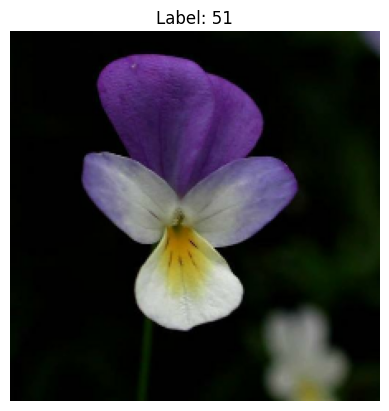

In [5]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 
for image, label in train_dataset.take(1):  
    plt.imshow(image[0])  
    plt.title(f'Label: {label[0]}')  
    plt.axis('off')
    plt.show() 


### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [6]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)
   
    

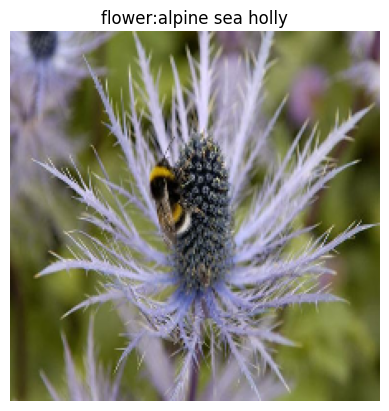

In [7]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 
# Example of accessing a category name
for images, labels in train_dataset.take(1):
    image = images[0].numpy().squeeze()
    label = str(labels[0].numpy())
    
    plt.imshow(image)
    plt.title('flower:'+ class_names[label])
    plt.axis("off")
    plt.show()

In [8]:
for image, label in train_dataset.take(3): 
    print(f'Image shape: {image.shape}, Label: {label.numpy()}')
    


Image shape: (32, 224, 224, 3), Label: [84 72 60  6 83 91 78 33  6 32 32 50  6 27 93 50 62 96 56 78 69 25 45 44
 68 48 85 21  7  5 21 53]
Image shape: (32, 224, 224, 3), Label: [ 14  13  81   3  28  62  69  52  41  69  36  47  37  31  14   5 101  44
   4  82  81  84   0  39  50  28  49  53  98  76 101   9]
Image shape: (32, 224, 224, 3), Label: [ 72  84  70  51  48  83  42  58  40  35  40  60  59  95  87  23  91  70
  75  87  58  79  24  20  64  89  40 100  62  95  16  84]


## Create Pipeline

In [9]:
# # TODO: Create a pipeline for each set.
# used this snippet from https://github.com/sondosaabed/Flowers-Image-Classifier-with-Deep-Learning-TF


train_batch = train_dataset.map(normalize).cache().shuffle(1020//4).batch(32).prefetch(1)

validation_batch = validation_dataset.map(normalize).cache().batch(32).prefetch(1)
test_batch = test_dataset.map(normalize).cache().batch(32).prefetch(1)




# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [10]:
import tensorflow_hub as hub
#used the instructions from one of the video lessons
mobilenet_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
mobilenet = hub.KerasLayer(mobilenet_url, input_shape=[224, 224, 3],trainable=True)

final_model = tf.keras.Sequential([
    mobilenet,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),# recommended by chatgpt to increase accuracy percentage
    tf.keras.layers.Dense(102,activation='softmax')
    
])

final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = final_model.fit(train_dataset, 
                          validation_data=validation_dataset, 
                          epochs=50, 
                          callbacks=[early_stopping])

# increased the number of epochs for higher accuracy, and early stopping to
#prevent the training of unnecessary epochs and restore the best weights

Epoch 1/50
31/31 [==============================] - 57s 300ms/step - loss: 5.2357 - accuracy: 0.0212 - val_loss: 4.7185 - val_accuracy: 0.0373
Epoch 2/50
31/31 [==============================] - 11s 265ms/step - loss: 4.0711 - accuracy: 0.1250 - val_loss: 4.2532 - val_accuracy: 0.0857
Epoch 3/50
31/31 [==============================] - 11s 263ms/step - loss: 3.3043 - accuracy: 0.2379 - val_loss: 3.6849 - val_accuracy: 0.2127
Epoch 4/50
31/31 [==============================] - 11s 263ms/step - loss: 2.4935 - accuracy: 0.4496 - val_loss: 3.1854 - val_accuracy: 0.3458
Epoch 5/50
31/31 [==============================] - 11s 264ms/step - loss: 1.9381 - accuracy: 0.5645 - val_loss: 2.7373 - val_accuracy: 0.4577
Epoch 6/50
31/31 [==============================] - 11s 263ms/step - loss: 1.4631 - accuracy: 0.6815 - val_loss: 2.4032 - val_accuracy: 0.5302
Epoch 7/50
31/31 [==============================] - 11s 263ms/step - loss: 1.0829 - accuracy: 0.7853 - val_loss: 2.1564 - val_accuracy: 0.5837

Text(0.5, 0, 'Epoch')

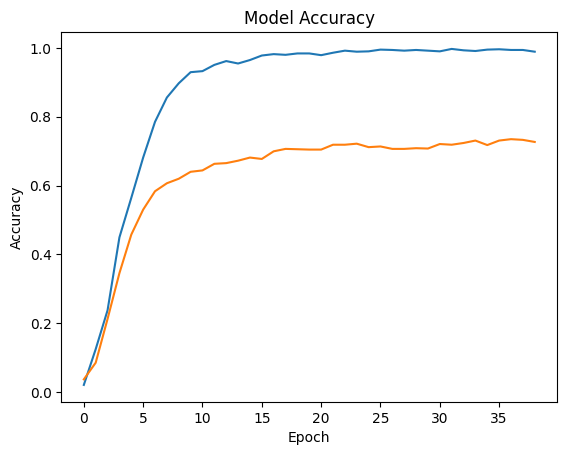

In [11]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')





Text(0.5, 0, 'Epoch')

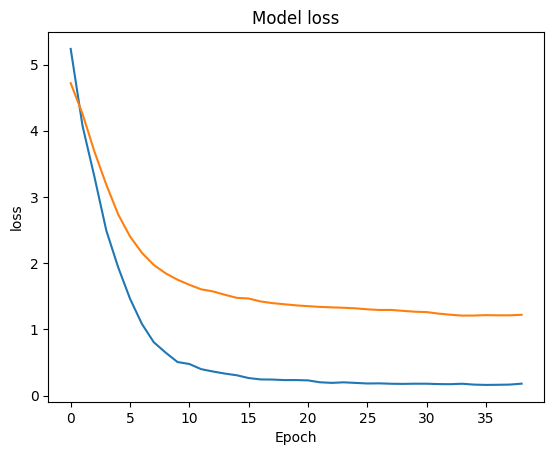

In [12]:
#plot test vs val loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [13]:
# TODO: Print the loss and accuracy values achieved on the entire test set.

test_loss, test_accuracy = final_model.evaluate(test_dataset)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")



192/192 [==============================] - 25s 130ms/step - loss: 1.4168 - accuracy: 0.7005
Test Accuracy: 70.05%
Test Loss: 1.4168


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [14]:
# TODO: Save your trained model as a Keras model.

final_model.save('my_model')

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 960, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7568faee90>, 136843468166672), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 960, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7568faee90>, 136843468166672), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75384d1910>, 136843468166112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75384d1910>, 136843468166112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 144, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753830aa10>, 136843468165776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 144, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753830aa10>, 136843468165776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753833dad0>, 136843468165216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753833dad0>, 136843468165216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538368290>, 136843468163200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538368290>, 136843468163200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 384, 96), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753836ec10>, 136843468074864), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 384, 96), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753836ec10>, 136843468074864), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753837dc10>, 136843468162752), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753837dc10>, 136843468162752), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 32, 192), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383848d0>, 136843711985392), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 32, 192), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383848d0>, 136843711985392), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 32, 192), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538397950>, 136843711985680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 32, 192), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538397950>, 136843711985680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383a2810>, 136843468162416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383a2810>, 136843468162416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383b5a50>, 136843468161856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383b5a50>, 136843468161856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383c8910>, 136843468161520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383c8910>, 136843468161520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383cf690>, 136843468161184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383cf690>, 136843468161184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383e6590>, 136843468078448), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383e6590>, 136843468078448), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 192, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383f1790>, 136843468078112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 192, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383f1790>, 136843468078112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538208510>, 136843468077328), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538208510>, 136843468077328), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753820f4d0>, 136843468076992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753820f4d0>, 136843468076992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753821e390>, 136843468076656), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753821e390>, 136843468076656), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 160, 960), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382313d0>, 136843468073184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 160, 960), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382313d0>, 136843468073184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538248250>, 136843468075648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538248250>, 136843468075648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382530d0>, 136843468075312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382530d0>, 136843468075312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 144, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753825e0d0>, 136843468074976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 144, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753825e0d0>, 136843468074976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 960, 160), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538275090>, 136843468067584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 960, 160), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538275090>, 136843468067584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753827fed0>, 136843468073968), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753827fed0>, 136843468073968), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753828ae50>, 136843468073632), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753828ae50>, 136843468073632), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 960, 320), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382a9d90>, 136843465363552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 960, 320), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382a9d90>, 136843465363552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382ad0d0>, 136843712077552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382ad0d0>, 136843712077552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 16, 96), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382c7f10>, 136843711986832), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 16, 96), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382c7f10>, 136843711986832), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382cf0d0>, 136843468071952), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382cf0d0>, 136843468071952), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382e6110>, 136843711987120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382e6110>, 136843711987120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382ed210>, 136843468071392), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382ed210>, 136843468071392), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538103f50>, 136843468071056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538103f50>, 136843468071056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1280,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753811af50>, 136843711987408), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1280,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753811af50>, 136843711987408), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753812a1d0>, 136843468070384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753812a1d0>, 136843468070384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1280,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381092d0>, 136843712069776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1280,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381092d0>, 136843712069776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538109750>, 136843468070048), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538109750>, 136843468070048), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538153350>, 136843468069712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538153350>, 136843468069712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753816a2d0>, 136843468069376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753816a2d0>, 136843468069376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538165510>, 136843468069040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538165510>, 136843468069040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753818c410>, 136843468068704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753818c410>, 136843468068704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 144, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753819b2d0>, 136843467929200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 144, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753819b2d0>, 136843467929200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 320, 1280), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381a63d0>, 136843465273504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 320, 1280), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381a63d0>, 136843465273504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381b5810>, 136843468068368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381b5810>, 136843468068368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381c4690>, 136843468068032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381c4690>, 136843468068032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 64, 384), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381cf550>, 136843464496208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 64, 384), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381cf550>, 136843464496208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 1280, 1001), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381de510>, 136843712070256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 1280, 1001), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381de510>, 136843712070256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381e9790>, 136843468067024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381e9790>, 136843468067024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530708650>, 136843468066688), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530708650>, 136843468066688), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530717750>, 136843468066352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530717750>, 136843468066352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530722790>, 136843468066016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530722790>, 136843468066016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 192, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530739990>, 136843468065680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 192, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530739990>, 136843468065680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 960, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530740910>, 136843468065344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 960, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530740910>, 136843468065344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 64, 384), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753074b8d0>, 136843712070544), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 64, 384), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753074b8d0>, 136843712070544), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 576, 160), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753075a8d0>, 136843467923040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 576, 160), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753075a8d0>, 136843467923040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530771d10>, 136843468064448), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530771d10>, 136843468064448), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 160, 960), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530784b10>, 136843467919680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 160, 960), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530784b10>, 136843467919680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753078fb50>, 136843468064000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753078fb50>, 136843468064000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753079ebd0>, 136843468063664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753079ebd0>, 136843468063664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307b1d90>, 136843468062992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307b1d90>, 136843468062992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307c0a50>, 136843467930768), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307c0a50>, 136843467930768), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 384, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307cb9d0>, 136843467930432), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 384, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307cb9d0>, 136843467930432), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307dabd0>, 136843467929872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307dabd0>, 136843467929872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307edc90>, 136843467929536), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307edc90>, 136843467929536), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 192, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305fca50>, 136843467921472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 192, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305fca50>, 136843467921472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753060bb90>, 136843467928528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753060bb90>, 136843467928528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753061ea90>, 136843467927632), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753061ea90>, 136843467927632), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530619b90>, 136843467926960), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530619b90>, 136843467926960), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530640a90>, 136843467926624), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530640a90>, 136843467926624), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753064fa50>, 136843467925728), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753064fa50>, 136843467925728), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1001,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530662850>, 136843712071408), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1001,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530662850>, 136843712071408), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 576, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530671950>, 136843467925392), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 576, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530671950>, 136843467925392), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530680b50>, 136843467925056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530680b50>, 136843467925056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c755a559750>, 136843467924720), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c755a559750>, 136843467924720), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 32, 192), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753069a990>, 136843712071792), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 32, 192), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753069a990>, 136843712071792), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 384, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306b1ad0>, 136843467924160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 384, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306b1ad0>, 136843467924160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 960, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306c0990>, 136843467923824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 960, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306c0990>, 136843467923824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306cfb10>, 136843467923488), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306cfb10>, 136843467923488), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 96, 576), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306e2890>, 136843467920352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 96, 576), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306e2890>, 136843467920352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306f1b10>, 136843467922704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306f1b10>, 136843467922704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306e8990>, 136843467922368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306e8990>, 136843467922368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753050f990>, 136843467921808), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753050f990>, 136843467921808), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530526890>, 136843467921136), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530526890>, 136843467921136), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530529a50>, 136843467920800), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530529a50>, 136843467920800), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530529750>, 136843467920464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530529750>, 136843467920464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 96, 576), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753054f810>, 136843467918336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 96, 576), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753054f810>, 136843467918336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753055a910>, 136843467920016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753055a910>, 136843467920016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 144, 24), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753056d8d0>, 136843467896992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 144, 24), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753056d8d0>, 136843467896992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530588a90>, 136843467919344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530588a90>, 136843467919344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 32, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530593790>, 136843712072848), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 32, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530593790>, 136843712072848), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305aa9d0>, 136843467918672), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305aa9d0>, 136843467918672), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 576, 96), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305b5910>, 136843467897104), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 576, 96), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305b5910>, 136843467897104), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305c8850>, 136843467918000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305c8850>, 136843467918000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305cf890>, 136843467917664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305cf890>, 136843467917664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305e28d0>, 136843467917328), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305e28d0>, 136843467917328), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305e9b10>, 136843467916992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305e9b10>, 136843467916992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530400950>, 136843467916656), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530400950>, 136843467916656), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753040f750>, 136843467916096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753040f750>, 136843467916096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 960, 160), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304266d0>, 136843467895536), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 960, 160), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304266d0>, 136843467895536), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530429a50>, 136843467915648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530429a50>, 136843467915648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530429750>, 136843467915312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530429750>, 136843467915312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304577d0>, 136843467898448), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304577d0>, 136843467898448), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 24, 144), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530462590>, 136843712073808), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 24, 144), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530462590>, 136843712073808), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304718d0>, 136843467897888), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304718d0>, 136843467897888), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530480890>, 136843467897216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530480890>, 136843467897216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 576, 96), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753048b650>, 136843467893296), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 576, 96), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753048b650>, 136843467893296), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 96, 24), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753049e390>, 136843467886352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 96, 24), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753049e390>, 136843467886352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304b1690>, 136843467896656), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304b1690>, 136843467896656), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304b84d0>, 136843467896320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304b84d0>, 136843467896320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304cf590>, 136843467895984), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304cf590>, 136843467895984), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304e2610>, 136843467895648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304e2610>, 136843467895648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 384, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304f1510>, 136843467888480), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 384, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304f1510>, 136843467888480), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530304490>, 136843467895200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530304490>, 136843467895200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753030f510>, 136843467894416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753030f510>, 136843467894416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 3, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530322310>, 136843699067504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 3, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530322310>, 136843699067504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530339590>, 136843467894080), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530339590>, 136843467894080), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530339750>, 136843467893744), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530339750>, 136843467893744), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753034f510>, 136843467893408), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753034f510>, 136843467893408), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 384, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753035e3d0>, 136843467882880), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 384, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753035e3d0>, 136843467882880), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530371690>, 136843467892960), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530371690>, 136843467892960), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 96, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530384250>, 136843467892624), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 96, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530384250>, 136843467892624), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 64, 384), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753038f1d0>, 136843712074864), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 64, 384), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753038f1d0>, 136843712074864), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753039e3d0>, 136843467891504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753039e3d0>, 136843467891504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303ad4d0>, 136843467891168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303ad4d0>, 136843467891168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303c4490>, 136843467890496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303c4490>, 136843467890496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303cf290>, 136843467890160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303cf290>, 136843467890160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303de350>, 136843467889600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303de350>, 136843467889600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303ed650>, 136843467889264), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303ed650>, 136843467889264), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530208550>, 136843467888928), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530208550>, 136843467888928), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530213490>, 136843467888592), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530213490>, 136843467888592), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 64, 384), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753021e3d0>, 136843712075152), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 64, 384), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753021e3d0>, 136843712075152), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 96, 576), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530225410>, 136843467882992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 96, 576), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530225410>, 136843467882992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(320,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753023ffd0>, 136843467888144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(320,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753023ffd0>, 136843467888144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753024f390>, 136843467887808), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753024f390>, 136843467887808), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753025e310>, 136843467887472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753025e310>, 136843467887472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 192, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530271310>, 136843467886800), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 192, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530271310>, 136843467886800), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 576, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753027ffd0>, 136843467886464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 576, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753027ffd0>, 136843467886464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 192, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530286e50>, 136843465720864), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 192, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530286e50>, 136843465720864), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 576, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753029de90>, 136843467885568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 576, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753029de90>, 136843467885568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(320,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530294ed0>, 136843467885232), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(320,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530294ed0>, 136843467885232), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302afe10>, 136843467884896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302afe10>, 136843467884896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302d2f10>, 136843467884224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302d2f10>, 136843467884224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 24, 144), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302ddcd0>, 136843712075824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 24, 144), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302ddcd0>, 136843712075824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 160, 960), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302f0e50>, 136843465721088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 160, 960), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302f0e50>, 136843465721088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 192, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302f7b50>, 136843465721424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 192, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302f7b50>, 136843465721424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753010f0d0>, 136843467882544), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753010f0d0>, 136843467882544), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 384, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530119e90>, 136843465721312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 384, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530119e90>, 136843465721312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530128fd0>, 136843467569984), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530128fd0>, 136843467569984), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530137e90>, 136843467569648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530137e90>, 136843467569648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 384, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753014ad50>, 136843467569088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 384, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753014ad50>, 136843467569088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530161d90>, 136843467568752), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530161d90>, 136843467568752), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530174f50>, 136843467568416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530174f50>, 136843467568416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530183f90>, 136843698877392), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530183f90>, 136843698877392), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530193050>, 136843698878624), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530193050>, 136843698878624), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753019e110>, 136843698878960), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753019e110>, 136843698878960), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75301b12d0>, 136843698879408), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75301b12d0>, 136843698879408), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75301bc290>, 136843698880192), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75301bc290>, 136843698880192), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 384, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75301d7090>, 136843465720192), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 384, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75301d7090>, 136843465720192), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75301e6210>, 136843465720976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75301e6210>, 136843465720976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 960, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7568faee90>, 136843468166672), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 960, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7568faee90>, 136843468166672), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75384d1910>, 136843468166112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75384d1910>, 136843468166112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 144, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753830aa10>, 136843468165776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 144, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753830aa10>, 136843468165776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753833dad0>, 136843468165216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753833dad0>, 136843468165216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538368290>, 136843468163200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538368290>, 136843468163200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 384, 96), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753836ec10>, 136843468074864), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 384, 96), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753836ec10>, 136843468074864), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753837dc10>, 136843468162752), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753837dc10>, 136843468162752), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 32, 192), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383848d0>, 136843711985392), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 32, 192), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383848d0>, 136843711985392), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 32, 192), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538397950>, 136843711985680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 32, 192), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538397950>, 136843711985680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383a2810>, 136843468162416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383a2810>, 136843468162416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383b5a50>, 136843468161856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383b5a50>, 136843468161856), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383c8910>, 136843468161520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383c8910>, 136843468161520), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383cf690>, 136843468161184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383cf690>, 136843468161184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383e6590>, 136843468078448), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383e6590>, 136843468078448), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 192, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383f1790>, 136843468078112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 192, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75383f1790>, 136843468078112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538208510>, 136843468077328), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538208510>, 136843468077328), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753820f4d0>, 136843468076992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753820f4d0>, 136843468076992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753821e390>, 136843468076656), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 32, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753821e390>, 136843468076656), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 160, 960), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382313d0>, 136843468073184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 160, 960), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382313d0>, 136843468073184), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538248250>, 136843468075648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538248250>, 136843468075648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382530d0>, 136843468075312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382530d0>, 136843468075312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 144, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753825e0d0>, 136843468074976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 144, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753825e0d0>, 136843468074976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 960, 160), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538275090>, 136843468067584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 960, 160), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538275090>, 136843468067584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753827fed0>, 136843468073968), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753827fed0>, 136843468073968), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753828ae50>, 136843468073632), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753828ae50>, 136843468073632), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 960, 320), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382a9d90>, 136843465363552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 960, 320), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382a9d90>, 136843465363552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382ad0d0>, 136843712077552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382ad0d0>, 136843712077552), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 16, 96), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382c7f10>, 136843711986832), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 16, 96), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382c7f10>, 136843711986832), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382cf0d0>, 136843468071952), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382cf0d0>, 136843468071952), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382e6110>, 136843711987120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382e6110>, 136843711987120), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382ed210>, 136843468071392), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75382ed210>, 136843468071392), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538103f50>, 136843468071056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538103f50>, 136843468071056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1280,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753811af50>, 136843711987408), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1280,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753811af50>, 136843711987408), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753812a1d0>, 136843468070384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753812a1d0>, 136843468070384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1280,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381092d0>, 136843712069776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1280,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381092d0>, 136843712069776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538109750>, 136843468070048), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538109750>, 136843468070048), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538153350>, 136843468069712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538153350>, 136843468069712), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753816a2d0>, 136843468069376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753816a2d0>, 136843468069376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538165510>, 136843468069040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7538165510>, 136843468069040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753818c410>, 136843468068704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753818c410>, 136843468068704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 144, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753819b2d0>, 136843467929200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 144, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753819b2d0>, 136843467929200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 320, 1280), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381a63d0>, 136843465273504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 320, 1280), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381a63d0>, 136843465273504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381b5810>, 136843468068368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381b5810>, 136843468068368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381c4690>, 136843468068032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381c4690>, 136843468068032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 64, 384), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381cf550>, 136843464496208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 64, 384), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381cf550>, 136843464496208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 1280, 1001), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381de510>, 136843712070256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 1280, 1001), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381de510>, 136843712070256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381e9790>, 136843468067024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75381e9790>, 136843468067024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530708650>, 136843468066688), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530708650>, 136843468066688), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530717750>, 136843468066352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530717750>, 136843468066352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530722790>, 136843468066016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530722790>, 136843468066016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 192, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530739990>, 136843468065680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 192, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530739990>, 136843468065680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 960, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530740910>, 136843468065344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 960, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530740910>, 136843468065344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 64, 384), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753074b8d0>, 136843712070544), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 64, 384), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753074b8d0>, 136843712070544), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 576, 160), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753075a8d0>, 136843467923040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 576, 160), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753075a8d0>, 136843467923040), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530771d10>, 136843468064448), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530771d10>, 136843468064448), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 160, 960), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530784b10>, 136843467919680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 160, 960), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530784b10>, 136843467919680), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753078fb50>, 136843468064000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753078fb50>, 136843468064000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753079ebd0>, 136843468063664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753079ebd0>, 136843468063664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307b1d90>, 136843468062992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307b1d90>, 136843468062992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307c0a50>, 136843467930768), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307c0a50>, 136843467930768), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 384, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307cb9d0>, 136843467930432), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 384, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307cb9d0>, 136843467930432), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307dabd0>, 136843467929872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307dabd0>, 136843467929872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307edc90>, 136843467929536), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(16,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75307edc90>, 136843467929536), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 192, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305fca50>, 136843467921472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 192, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305fca50>, 136843467921472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753060bb90>, 136843467928528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753060bb90>, 136843467928528), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753061ea90>, 136843467927632), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753061ea90>, 136843467927632), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530619b90>, 136843467926960), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530619b90>, 136843467926960), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530640a90>, 136843467926624), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530640a90>, 136843467926624), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753064fa50>, 136843467925728), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753064fa50>, 136843467925728), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1001,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530662850>, 136843712071408), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1001,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530662850>, 136843712071408), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 576, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530671950>, 136843467925392), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 576, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530671950>, 136843467925392), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530680b50>, 136843467925056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530680b50>, 136843467925056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c755a559750>, 136843467924720), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c755a559750>, 136843467924720), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 32, 192), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753069a990>, 136843712071792), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 32, 192), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753069a990>, 136843712071792), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 384, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306b1ad0>, 136843467924160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 384, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306b1ad0>, 136843467924160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 960, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306c0990>, 136843467923824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 960, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306c0990>, 136843467923824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306cfb10>, 136843467923488), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306cfb10>, 136843467923488), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 96, 576), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306e2890>, 136843467920352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 96, 576), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306e2890>, 136843467920352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306f1b10>, 136843467922704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306f1b10>, 136843467922704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306e8990>, 136843467922368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75306e8990>, 136843467922368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753050f990>, 136843467921808), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753050f990>, 136843467921808), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530526890>, 136843467921136), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530526890>, 136843467921136), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530529a50>, 136843467920800), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530529a50>, 136843467920800), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530529750>, 136843467920464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530529750>, 136843467920464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 96, 576), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753054f810>, 136843467918336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 96, 576), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753054f810>, 136843467918336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753055a910>, 136843467920016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753055a910>, 136843467920016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 144, 24), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753056d8d0>, 136843467896992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 144, 24), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753056d8d0>, 136843467896992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530588a90>, 136843467919344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530588a90>, 136843467919344), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 32, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530593790>, 136843712072848), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 32, 16), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530593790>, 136843712072848), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305aa9d0>, 136843467918672), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305aa9d0>, 136843467918672), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 576, 96), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305b5910>, 136843467897104), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 576, 96), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305b5910>, 136843467897104), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305c8850>, 136843467918000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305c8850>, 136843467918000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305cf890>, 136843467917664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305cf890>, 136843467917664), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305e28d0>, 136843467917328), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(160,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305e28d0>, 136843467917328), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305e9b10>, 136843467916992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75305e9b10>, 136843467916992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530400950>, 136843467916656), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530400950>, 136843467916656), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753040f750>, 136843467916096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753040f750>, 136843467916096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 960, 160), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304266d0>, 136843467895536), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 960, 160), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304266d0>, 136843467895536), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530429a50>, 136843467915648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530429a50>, 136843467915648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530429750>, 136843467915312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530429750>, 136843467915312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304577d0>, 136843467898448), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304577d0>, 136843467898448), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 24, 144), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530462590>, 136843712073808), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 24, 144), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530462590>, 136843712073808), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304718d0>, 136843467897888), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304718d0>, 136843467897888), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530480890>, 136843467897216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530480890>, 136843467897216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 576, 96), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753048b650>, 136843467893296), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 576, 96), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753048b650>, 136843467893296), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 96, 24), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753049e390>, 136843467886352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 96, 24), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753049e390>, 136843467886352), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304b1690>, 136843467896656), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304b1690>, 136843467896656), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304b84d0>, 136843467896320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304b84d0>, 136843467896320), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304cf590>, 136843467895984), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304cf590>, 136843467895984), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304e2610>, 136843467895648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304e2610>, 136843467895648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 384, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304f1510>, 136843467888480), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 384, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75304f1510>, 136843467888480), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530304490>, 136843467895200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530304490>, 136843467895200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753030f510>, 136843467894416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753030f510>, 136843467894416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 3, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530322310>, 136843699067504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 3, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530322310>, 136843699067504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530339590>, 136843467894080), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530339590>, 136843467894080), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530339750>, 136843467893744), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530339750>, 136843467893744), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753034f510>, 136843467893408), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753034f510>, 136843467893408), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 384, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753035e3d0>, 136843467882880), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 384, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753035e3d0>, 136843467882880), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530371690>, 136843467892960), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(192,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530371690>, 136843467892960), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 96, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530384250>, 136843467892624), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 96, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530384250>, 136843467892624), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 64, 384), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753038f1d0>, 136843712074864), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 64, 384), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753038f1d0>, 136843712074864), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753039e3d0>, 136843467891504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753039e3d0>, 136843467891504), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303ad4d0>, 136843467891168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303ad4d0>, 136843467891168), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303c4490>, 136843467890496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303c4490>, 136843467890496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303cf290>, 136843467890160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303cf290>, 136843467890160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303de350>, 136843467889600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(32,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303de350>, 136843467889600), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303ed650>, 136843467889264), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75303ed650>, 136843467889264), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530208550>, 136843467888928), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530208550>, 136843467888928), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530213490>, 136843467888592), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530213490>, 136843467888592), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 64, 384), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753021e3d0>, 136843712075152), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 64, 384), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753021e3d0>, 136843712075152), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 96, 576), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530225410>, 136843467882992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 96, 576), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530225410>, 136843467882992), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(320,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753023ffd0>, 136843467888144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(320,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753023ffd0>, 136843467888144), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753024f390>, 136843467887808), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753024f390>, 136843467887808), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753025e310>, 136843467887472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753025e310>, 136843467887472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 192, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530271310>, 136843467886800), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 192, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530271310>, 136843467886800), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 576, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753027ffd0>, 136843467886464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 576, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753027ffd0>, 136843467886464), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 192, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530286e50>, 136843465720864), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 192, 32), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530286e50>, 136843465720864), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 576, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753029de90>, 136843467885568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 576, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753029de90>, 136843467885568), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(320,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530294ed0>, 136843467885232), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(320,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530294ed0>, 136843467885232), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302afe10>, 136843467884896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302afe10>, 136843467884896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302d2f10>, 136843467884224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302d2f10>, 136843467884224), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 24, 144), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302ddcd0>, 136843712075824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 24, 144), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302ddcd0>, 136843712075824), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 160, 960), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302f0e50>, 136843465721088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 160, 960), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302f0e50>, 136843465721088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 192, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302f7b50>, 136843465721424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 192, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75302f7b50>, 136843465721424), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753010f0d0>, 136843467882544), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(384,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753010f0d0>, 136843467882544), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 384, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530119e90>, 136843465721312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 1, 384, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530119e90>, 136843465721312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530128fd0>, 136843467569984), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530128fd0>, 136843467569984), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530137e90>, 136843467569648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530137e90>, 136843467569648), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 384, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753014ad50>, 136843467569088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 384, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753014ad50>, 136843467569088), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530161d90>, 136843467568752), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530161d90>, 136843467568752), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530174f50>, 136843467568416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(144,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530174f50>, 136843467568416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530183f90>, 136843698877392), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530183f90>, 136843698877392), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530193050>, 136843698878624), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c7530193050>, 136843698878624), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753019e110>, 136843698878960), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(96,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c753019e110>, 136843698878960), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75301b12d0>, 136843698879408), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75301b12d0>, 136843698879408), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75301bc290>, 136843698880192), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(960,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75301bc290>, 136843698880192), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 384, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75301d7090>, 136843465720192), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(3, 3, 384, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75301d7090>, 136843465720192), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75301e6210>, 136843465720976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(576,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7c75301e6210>, 136843465720976), {}).


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


## Load the Keras Model

Load the Keras model you saved above.

In [15]:
# TODO: Load the Keras model
loaded_model = tf.keras.models.load_model('my_model')




# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [16]:
# TODO: Create the process_image function
def process_image(image):
    image = tf.image.resize(image, [224, 224])
    image = np.asarray(image)
    image = image / 255.0
    image = tf.cast(image, tf.float32)
    image = tf.expand_dims(image, axis=0) #chatgpt recommended this line to make the image compatible
#     , because the processed image showed up as a single line
    return image[0]



To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

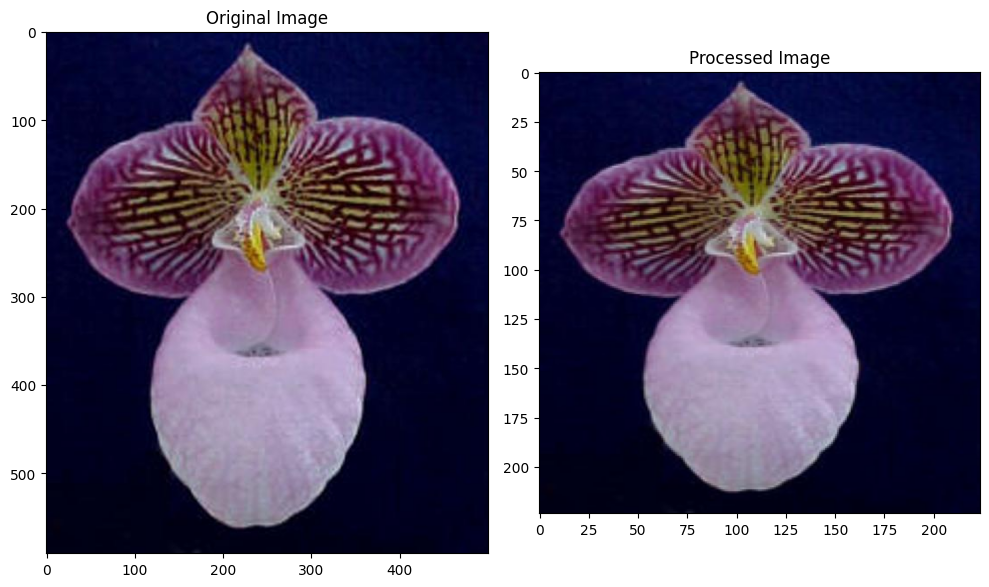

In [17]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()



Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [18]:
# TODO: Create the predict function
# referred to https://github.com/sondosaabed/Flowers-Image-Classifier-with-Deep-Learning-TF
#the parts with k because of many errors
def predict(image_path, model, top_k):
    image = Image.open(image_path)
    image = np.asarray(image)

    image = np.expand_dims(image, axis=0)
    processed_image = process_image(image)
    predictions = model.predict(processed_image)
    
    top_k_probs, top_k_indices = tf.math.top_k(predictions, k=top_k)
    top_k_probs = list(top_k_probs.numpy().flatten())
    top_k_indices = list(top_k_indices.numpy().flatten())
    class_names = [str(i) for i in top_k_indices]
   
    return top_k_probs, class_names





# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

1/1 [==============================] - 2s 2s/step


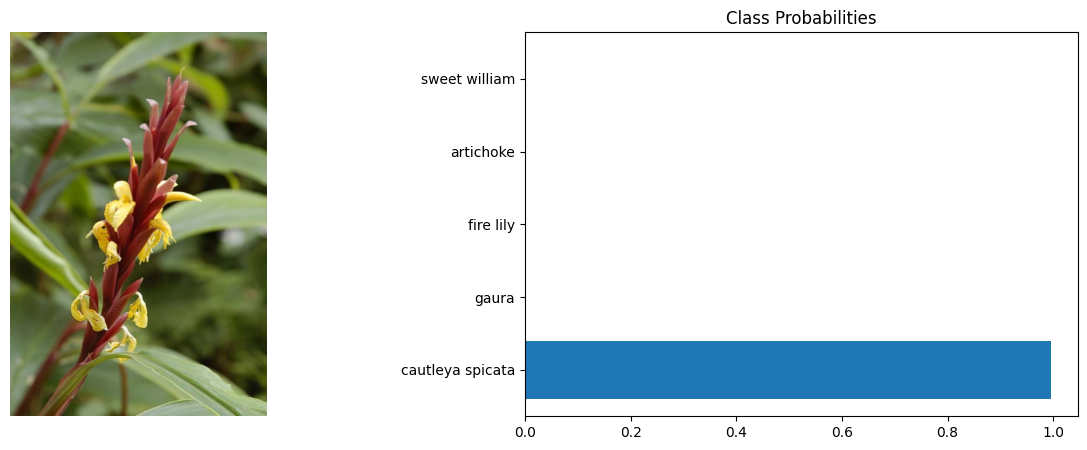

1/1 [==============================] - 0s 29ms/step


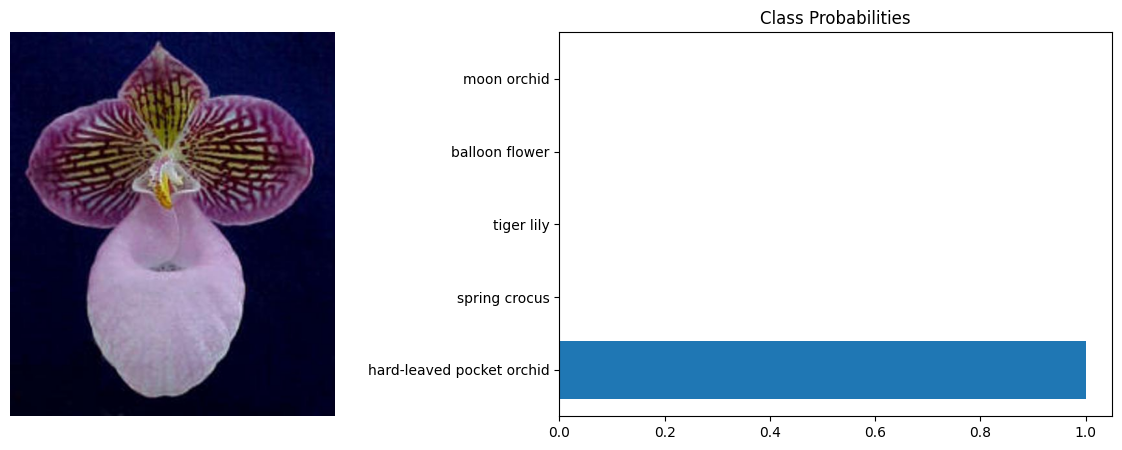

1/1 [==============================] - 0s 29ms/step


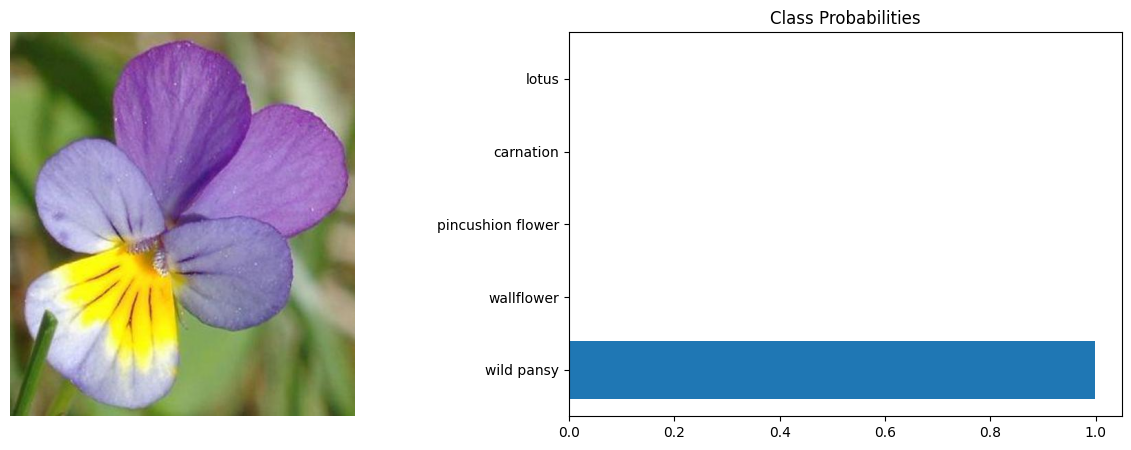

1/1 [==============================] - 0s 39ms/step


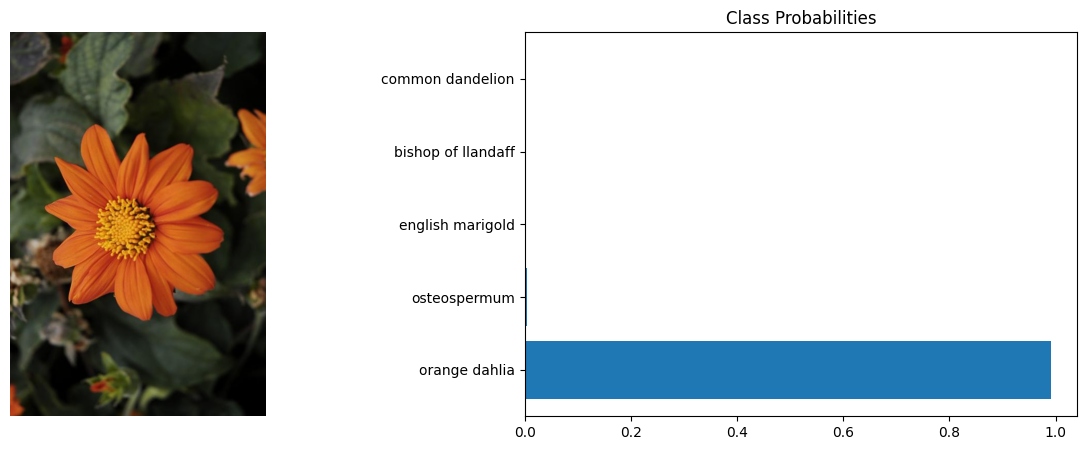

In [19]:
def plot_image(image_path,top_k):
    probs, classes = predict(image_path, final_model, top_k)
    flower_names = [class_names[str(int(i))] for i in classes] #collect labels

    fig, (ax1, ax2) = plt.subplots(ncols=2)
    plt.subplots_adjust(left=0.1, right=2, top=0.9, bottom=0.1)

    ax1.imshow(Image.open(image_path))
    ax1.axis('off')

    ax2.barh(flower_names, probs)
    ax2.set_title('Class Probabilities')
    plt.show()


plot_image('./test_images/cautleya_spicata.jpg',5)
plot_image('./test_images/hard-leaved_pocket_orchid.jpg',5)
plot_image('./test_images/wild_pansy.jpg',5)
plot_image('./test_images/orange_dahlia.jpg',5)

